In [312]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


In [372]:
df = pd.read_csv('../../data/processed/final-dataset.csv')
df = df[df['team'] != df['opponent_team']]
df = df.reset_index(drop=True)
df.head()

,season,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016/17,Aaron Cresswell,DEF,West Ham United,0,0,0,0,0.0,454,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-15T19:00:00Z,0,Aston Villa,0,0,0,0,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,2016/17,Aaron Lennon,MID,Everton,0,0,6,0,0.3,142,3,0,0,0.9,8.2,0.0,0.0,0.0,0.0,0.0,2016-08-13T14:00:00Z,15,Brighton & Hove Albion,0,0,0,0,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2016/17,Aaron Ramsey,MID,Arsenal,0,0,5,0,4.9,16,8,3,0,3.0,2.2,0.0,0.0,0.0,0.0,0.0,2016-08-14T15:00:00Z,60,Wolverhampton Wanderers,0,0,0,0,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,2016/17,Abdoulaye Doucouré,MID,Watford,0,0,0,0,0.0,482,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-13T14:00:00Z,0,Southampton,0,0,0,0,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,2016/17,Abdul Baba,DEF,Chelsea,0,0,0,0,0.0,80,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-15T19:00:00Z,0,Manchester City,0,0,0,0,0,1243,1.0,2.0,0.0,0,0,0,0,55,True,0,1


In [374]:
# df[df['name'].str.contains('Joelint')]

## Feature Engineering

In [314]:
df = df.sort_values(by=['season', 'name', 'opponent_team', 'GW']).reset_index(drop=True)

### Create New Features

#### Calculate Last 5 Features (Team's Side)

In [315]:
def calculate_points(row):
    if row['was_home'] == 1:
        # Tim bermain kandang
        if row['team_a_score'] < row['team_h_score']:
            return 3  # Menang kandang
        elif row['team_a_score'] > row['team_h_score']:
            return 0  # Kalah kandang
        else:
            return 1  # Imbang
    else:
        # Tim bermain tandang
        if row['team_a_score'] > row['team_h_score']:
            return 3  # Menang tandang
        elif row['team_a_score'] < row['team_h_score']:
            return 0  # Kalah tandang
        else:
            return 1  # Imbang
        
df['points'] = df.apply(calculate_points, axis=1)

In [316]:
df = df.sort_values(by=['team', 'season', 'GW'])
df['team_tot_points_last_5_matches'] = df.groupby('team')['points'].rolling(window=5, min_periods=1).sum().reset_index(level=0, drop=True)

In [317]:
df = df.sort_values(by=['team', 'opponent_team', 'season', 'GW'])
df['team_tot_points_last_5_h2h'] = df.groupby(['team', 'opponent_team'])['points'].\
    rolling(window=5, min_periods=1).sum().reset_index(level=[0, 1], drop=True)

In [318]:
df.drop('points', axis=1, inplace=True)

In [319]:
df

,season,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,team_tot_points_last_5_matches,team_tot_points_last_5_h2h
77,2016/17,Aaron Ramsey,MID,Arsenal,0,0,0,0,0.0,16,13,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2016-08-20T16:30:00Z,0,Aston Villa,0,0,0,0,0,96836,0.0,0.0,0.0,0,-74173,1610,75783,79,False,0,2,1.0,1.0
1122,2016/17,Alex Iwobi,MID,Arsenal,0,0,0,0,0.0,21,13,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2016-08-20T16:30:00Z,0,Aston Villa,0,0,0,0,0,31360,0.0,0.0,0.0,0,-18916,1266,20182,60,False,0,2,2.0,2.0
1196,2016/17,Alex Oxlade-Chamberlain,MID,Arsenal,0,0,11,1,15.0,18,13,0,0,5.1,8.8,0.0,0.00,0.00,0.00,0.00,2016-08-20T16:30:00Z,77,Aston Villa,0,0,0,0,0,79295,0.0,0.0,27.0,3,16361,20549,4188,60,False,0,2,3.0,3.0
1361,2016/17,Alexis Sánchez,FWD,Arsenal,0,0,9,1,42.3,12,13,0,0,8.8,9.2,0.0,0.00,0.00,0.00,0.00,2016-08-20T16:30:00Z,90,Aston Villa,0,0,0,0,0,307114,0.0,0.0,36.0,3,-20160,5439,25599,110,False,0,2,4.0,4.0
3725,2016/17,Calum Chambers,DEF,Arsenal,0,0,0,0,0.0,11,13,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2016-08-20T16:30:00Z,0,Aston Villa,0,0,0,0,0,169767,0.0,0.0,0.0,0,42967,49239,6272,45,False,0,2,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194356,2023/24,Tommy Doyle,MID,Wolverhampton Wanderers,0,0,8,0,13.3,351,320,2,0,3.8,3.0,1.5,0.05,0.19,0.14,1.08,2024-04-06T14:00:00Z,86,West Ham United,0,0,0,0,0,6060,2.0,1.0,22.0,2,-194,74,268,44,True,0,32,0.0,0.0
194470,2023/24,Toti Gomes,DEF,Wolverhampton Wanderers,0,0,9,0,2.1,573,320,2,0,1.7,15.2,1.5,0.01,0.01,0.00,1.13,2024-04-06T14:00:00Z,90,West Ham United,0,0,0,0,0,29730,2.0,1.0,0.0,0,-887,793,1680,44,True,1,32,0.0,0.0
194611,2023/24,Ty Barnett,MID,Wolverhampton Wanderers,0,0,0,0,0.0,770,320,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2024-04-06T14:00:00Z,0,West Ham United,0,0,0,0,0,483,2.0,1.0,0.0,0,-12,11,23,45,True,0,32,0.0,0.0
195420,2023/24,Wes Okoduwa,DEF,Wolverhampton Wanderers,0,0,0,0,0.0,832,320,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2024-04-06T14:00:00Z,0,West Ham United,0,0,0,0,0,699,2.0,1.0,0.0,0,17,88,71,40,True,0,32,0.0,0.0


In [320]:
df_ = pd.read_csv('../../data/processed/players_information.csv')

In [321]:
df[(df['team'] == 'Arsenal') & (df['name'].str.contains('Saka'))]

,season,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,team_tot_points_last_5_matches,team_tot_points_last_5_h2h
71192,2019/20,Bukayo Saka,FWD,Arsenal,0,0,8,0,15.3,541,51,1,0,2.9,8.4,0.0,0.00,0.00,0.00,0.00,2019-09-22T15:30:00Z,45,Aston Villa,0,0,0,0,0,3718,2.0,3.0,5.0,1,3050,3407,357,45,True,0,6,13.0,15.0
71193,2019/20,Bukayo Saka,FWD,Arsenal,0,0,0,0,12.6,541,361,1,0,2.0,1.2,0.0,0.00,0.00,0.00,0.00,2020-07-21T19:15:00Z,59,Aston Villa,0,0,0,0,0,451607,0.0,1.0,6.0,1,17326,31604,14278,47,False,0,46,3.0,0.0
93631,2020/21,Bukayo Saka,FWD,Arsenal,0,0,8,0,20.3,24,9,1,0,5.8,7.4,1.5,0.00,0.00,0.00,0.00,2020-09-19T19:00:00Z,88,Aston Villa,0,0,0,0,0,357292,1.0,2.0,30.0,2,-145334,7716,153050,54,True,0,2,15.0,9.0
93632,2020/21,Bukayo Saka,FWD,Arsenal,0,0,2,0,4.2,24,69,3,0,1.7,6.6,2.5,0.00,0.00,0.00,0.00,2020-11-08T19:15:00Z,90,Aston Villa,1,0,0,0,0,219061,3.0,0.0,6.0,0,7403,22944,15541,53,True,0,8,6.0,6.0
93633,2020/21,Bukayo Saka,FWD,Arsenal,0,0,18,0,59.6,24,219,1,0,10.5,21.6,5.3,0.00,0.00,0.00,0.00,2021-02-06T12:30:00Z,90,Aston Villa,0,0,0,0,0,805284,0.0,1.0,24.0,2,21444,69362,47918,54,False,0,23,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143401,2022/23,Bukayo Saka,MID,Arsenal,0,0,24,0,0.0,13,371,0,1,0.0,0.0,2.6,0.06,0.31,0.25,0.29,2023-05-28T15:30:00Z,59,Wolverhampton Wanderers,0,0,0,0,0,2913743,0.0,5.0,0.0,6,-192083,53458,245541,80,True,0,38,12.0,15.0
170938,2023/24,Bukayo Saka,MID,Arsenal,0,3,37,0,46.2,19,2,1,1,13.9,53.8,3.4,0.17,0.36,0.19,1.18,2023-08-12T12:00:00Z,90,Wolverhampton Wanderers,0,0,0,0,0,4878155,1.0,2.0,39.0,10,0,0,0,85,True,0,1,15.0,15.0
170939,2023/24,Bukayo Saka,MID,Arsenal,0,1,27,0,61.4,19,131,1,1,16.2,55.4,6.3,0.69,1.01,0.32,0.71,2023-12-02T15:00:00Z,90,Wolverhampton Wanderers,0,0,0,0,0,5784976,1.0,2.0,45.0,8,346127,378948,32821,88,True,0,14,15.0,15.0
170940,2023/24,Bukayo Saka,MID,Arsenal,0,0,10,1,44.3,19,340,0,0,10.3,14.6,10.0,0.28,0.49,0.21,0.14,2024-04-20T18:30:00Z,90,Wolverhampton Wanderers,0,0,0,0,0,6576783,2.0,0.0,44.0,3,362514,398558,36044,90,False,0,34,15.0,15.0


#### Calculate Last 5 Features (Player's Side)

Calculate Last 5 Features against Specific Team

In [322]:
def players_last_5_feature_vs_specific_team(df, agg_type, column_name):
    df = df.sort_values(by=['name', 'opponent_team', 'season', 'GW'])
    
    if agg_type == 'sum':    
        df[f'tot_{column_name}_last_5_h2h'] = df.groupby(['name', 'opponent_team'])[column_name].rolling(window=5, min_periods=1).sum().reset_index(level=[0, 1], drop=True)
        df[f'tot_{column_name}_last_5_h2h'] = df[f'tot_{column_name}_last_5_h2h'].astype(int)
    
    elif agg_type == 'avg':
        df[f'avg_{column_name}_last_5_h2h'] = df.groupby(['name', 'opponent_team'])[column_name].rolling(window=5, min_periods=1).mean().reset_index(level=[0, 1], drop=True)
        df[f'avg_{column_name}_last_5_h2h'] = round(df[f'avg_{column_name}_last_5_h2h'].astype(float))
        
    return df

In [323]:
sum_cols = ['assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored', 'own_goals', 
                  'penalties_missed', 'penalties_saved', 'red_cards', 'yellow_cards', 'saves', 'total_points']

avg_cols = ['ict_index', 'influence', 'creativity', 'threat', 'selected', 'minutes']

for col in sum_cols:
    df = players_last_5_feature_vs_specific_team(df, 'sum', col)
    
for col in avg_cols:
    df = players_last_5_feature_vs_specific_team(df, 'avg', col)

Calculate Last 5 Match Features against No Specific Team

In [324]:
def players_last_5_feature_vs_every_team(df, agg_type, column_name):
    df = df.sort_values(by=['name', 'season', 'GW'])
    
    if agg_type == 'sum':    
        df[f'tot_{column_name}_last_5'] = df.groupby(['name'])[column_name].rolling(window=5, min_periods=1).sum().reset_index(level=0, drop=True)
        df[f'tot_{column_name}_last_5'] = df[f'tot_{column_name}_last_5'].astype(int)
    
    elif agg_type == 'avg':
        df[f'avg_{column_name}_last_5'] = df.groupby(['name'])[column_name].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
        df[f'avg_{column_name}_last_5'] = round(df[f'avg_{column_name}_last_5'].astype(float))
        
    return df

In [325]:
sum_cols = ['assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored', 'own_goals', 
                  'penalties_missed', 'penalties_saved', 'red_cards', 'yellow_cards', 'saves', 'total_points']

avg_cols = ['ict_index', 'influence', 'creativity', 'threat', 'selected', 'minutes']

for col in sum_cols:
    df = players_last_5_feature_vs_every_team(df, 'sum', col)
    
for col in avg_cols:
    df = players_last_5_feature_vs_every_team(df, 'avg', col)

Filter the dataset without season == 2024/25

In [326]:
df_2425_upd_feat = df[df['season']=='2024/25']
# df = df[df['season'] != '2024-25'].reset_index(drop=True)

In [327]:
other_cols = ['element', 'fixture', 'xP', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 
              'transfers_balance', 'transfers_in', 'transfers_out', 'expected_goals_conceded', 'kickoff_time', 
              'team_a_score', 'team_h_score', 'value', 'minutes']

drop_cols = sum_cols + avg_cols + other_cols
drop_cols = [col for col in drop_cols if col not in ['total_points']] ## 'total_points' not included, cause this feature will be used for target model

df.drop(columns=(drop_cols), inplace=True)
df_2425_upd_feat = df_2425_upd_feat.drop(columns=(drop_cols))

In [328]:
def save_gw_data(df, gw):
    df.drop(['season', 'GW'], axis=1, inplace=True)
    df.reset_index(drop=True).\
        to_csv(f'../../data/fpl/gw-{gw}/fpl_2425_updated_features.csv', index=False)

In [329]:
df_2425_gw_1 = df_2425_upd_feat[df_2425_upd_feat['GW'] == 1] ## Change GW number manually
df_2425_gw_2 = df_2425_upd_feat[df_2425_upd_feat['GW'] == 2]
# df_2425_gw_3 = df_2425_upd_feat[df_2425_upd_feat['GW'] == 3]

save_gw_data(df_2425_gw_1, gw=1)
save_gw_data(df_2425_gw_2, gw=2)
# save_gw_data(df_2425_gw_3, gw=3)

C:\Users\marse\AppData\Local\Temp\ipykernel_41100\2180062574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['season', 'GW'], axis=1, inplace=True)
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\2180062574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['season', 'GW'], axis=1, inplace=True)


In [330]:
df = df.reset_index(drop=True)
df.head()

,season,name,position,team,opponent_team,total_points,was_home,GW,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,2019/20,Aaron Connolly,FWD,Brighton & Hove Albion,Ipswich Town,1,False,4,0.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,24.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,24.0
1,2019/20,Aaron Connolly,FWD,Brighton & Hove Albion,Burnley,1,True,5,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.0,1.0,0.0,21.0,14029.0,6.0,0,0,2,0,2,0,0,0,0,0,0,0,2,1.0,1.0,0.0,10.0,7014.0,15.0
2,2019/20,Aaron Connolly,FWD,Brighton & Hove Albion,Newcastle United,1,False,6,5.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.0,2.0,5.0,18.0,22804.0,20.0,0,0,3,0,2,0,0,0,0,0,0,0,3,2.0,1.0,2.0,13.0,12278.0,17.0
3,2019/20,Aaron Connolly,FWD,Brighton & Hove Albion,Chelsea,1,False,7,4.0,0.0,0,0,2,0,1,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,32699.0,25.0,0,0,5,0,3,0,0,0,0,0,0,0,4,1.0,1.0,1.0,10.0,17383.0,19.0
4,2019/20,Aaron Connolly,FWD,Brighton & Hove Albion,Tottenham Hotspur,13,True,8,3.0,3.0,0,3,53,1,0,2,0,0,0,0,0,0,13,20.0,70.0,24.0,107.0,35026.0,79.0,0,3,58,1,3,2,0,0,0,0,0,0,17,5.0,15.0,6.0,29.0,20912.0,31.0


### Scaling

In [331]:
df = df.drop(['season', 'GW'], axis=1)

In [332]:
import json

cols = df.select_dtypes(exclude=['object']).columns.tolist()

min_max_dict = {}
for col in cols:
    min_max_dict[col] = {
        "min": float(df[col].min()),
        "max": float(df[col].max())
    }

# Simpan dictionary sebagai JSON file
with open('../../data/json/min_max_values.json', 'w') as json_file:
    json.dump(min_max_dict, json_file, indent=2)

In [333]:
from sklearn.preprocessing import MinMaxScaler

cols = df.select_dtypes(exclude=['object']).columns.tolist()
cols = [col for col in cols if col not in ['was_home', 'GW']]

scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

### Encoding

In [334]:
from sklearn.preprocessing import LabelEncoder

le_name = LabelEncoder()
le_position = LabelEncoder()
le_team = LabelEncoder()

df['name'] = le_name.fit_transform(df['name'])
df['position'] = le_position.fit_transform(df['position'])
df['team'] = le_team.fit_transform(df['team'])
df['opponent_team'] = le_team.fit_transform(df['opponent_team'])
df['was_home'] = df['was_home'].map({False:0, True:1})


In [335]:
df.head()

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,0,1,4,13,0.222222,0,0.000000,0.266667,0.0,0.000000,0.101887,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.079545,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.0,0.000000,0.067847,0.0,0.05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.00,0.000000,0.000000,0.000000,0.000000,0.266667
1,0,1,4,5,0.222222,1,0.066667,0.066667,0.0,0.000000,0.101887,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.079545,0.055556,0.006098,0.000000,0.105528,0.001464,0.066667,0.0,0.000000,0.070796,0.0,0.10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.05,0.011494,0.000000,0.089286,0.000734,0.166667
2,0,1,4,21,0.222222,0,0.333333,0.333333,0.0,0.000000,0.101887,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.079545,0.055556,0.012195,0.040323,0.090452,0.002380,0.222222,0.0,0.000000,0.073746,0.0,0.10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.10,0.011494,0.021277,0.116071,0.001285,0.188889
3,0,1,4,7,0.222222,0,0.266667,0.000000,0.0,0.000000,0.105660,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.079545,0.000000,0.000000,0.008065,0.000000,0.003412,0.277778,0.0,0.000000,0.079646,0.0,0.15,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.107143,0.05,0.011494,0.010638,0.089286,0.001819,0.211111
4,0,1,4,29,0.555556,1,0.200000,0.200000,0.0,0.230769,0.298113,0.2,0.000000,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.215909,0.555556,0.426829,0.193548,0.537688,0.003655,0.877778,0.0,0.214286,0.235988,0.2,0.15,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.261905,0.25,0.172414,0.063830,0.258929,0.002188,0.344444


In [336]:
le_name.classes_

array(['Aaron Connolly', 'Aaron Cresswell', 'Aaron Hickey', ...,
       'Étienne Capoue', 'Ørjan Nyland', 'Đorđe Petrović'], dtype=object)

In [337]:
le_position.classes_

array(['DEF', 'FWD', 'GK', 'MID'], dtype=object)

In [338]:
le_team.classes_

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Ipswich Town', 'Leeds United', 'Leicester City',
       'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Sheffield United', 'Southampton',
       'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham Hotspur',
       'Watford', 'West Bromwich United', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)

In [339]:
player_dict = {name: i for i, name in enumerate(le_name.classes_.tolist())}
position_dict = {position: i for i, position in enumerate(le_position.classes_.tolist())}
team_dict = {team: i for i, team in enumerate(le_team.classes_.tolist())}

In [340]:
import json

with open('../../data/json/encoded_player_names.json', 'w') as json_file:
    json.dump(player_dict, json_file, indent=2)

with open('../../data/json/encoded_position.json', 'w') as json_file:
    json.dump(position_dict, json_file, indent=2)

with open('../../data/json/encoded_team_name.json', 'w') as json_file:
    json.dump(team_dict, json_file, indent=2)

## Modelling

In [341]:
from sklearn.model_selection import train_test_split

X = df.drop('total_points', axis=1)
y = df['total_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [342]:
from sklearn.metrics import mean_absolute_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = round(mean_absolute_error(y_train, y_train_pred), 4) * 100
    mae_test = round(mean_absolute_error(y_test, y_test_pred), 4) * 100
    
    r2_train = round(r2_score(y_train, y_train_pred), 4) * 100
    r2_test = round(r2_score(y_test, y_test_pred), 4) * 100 
    
    print(f"Mean Absolute Error \n Train: {mae_train} % | Test: {mae_test} %")
    print(f"R-squared \n Train: {r2_train} | Test: {r2_test}")
    
    return mae_train, mae_test, r2_train, r2_test

### Baseline Model

Linear Regression

In [343]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
mae_train_lr, mae_test_lr, r2_train_lr, r2_test_lr = evaluate_model(lr, X_train, X_test, y_train, y_test) 

Mean Absolute Error 
 Train: 2.65 % | Test: 2.63 %
R-squared 
 Train: 60.589999999999996 | Test: 60.51


XGBoost

In [344]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
mae_train_xgb, mae_test_xgb, r2_train_xgb, r2_test_xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test) 

Mean Absolute Error 
 Train: 1.21 % | Test: 1.39 %
R-squared 
 Train: 87.42 | Test: 80.58999999999999


Random Forest

In [345]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
mae_train_rf, mae_test_rf, r2_train_rf, r2_test_rf = evaluate_model(rf, X_train, X_test, y_train, y_test) 

Mean Absolute Error 
 Train: 0.49 % | Test: 1.29 %
R-squared 
 Train: 97.22 | Test: 80.27


LightGBM

In [346]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
mae_train_lgb, mae_test_lgb, r2_train_lgb, r2_test_lgb = evaluate_model(lgb_model, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2401
[LightGBM] [Info] Number of data points in the train set: 158032, number of used features: 45
[LightGBM] [Info] Start training from score 0.229915
Mean Absolute Error 
 Train: 1.38 % | Test: 1.43 %
R-squared 
 Train: 83.28 | Test: 80.55


CatBoost

In [347]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)
mae_train_catboost, mae_test_catboost, r2_train_catboost, r2_test_catboost = evaluate_model(catboost_model, X_train, X_test, y_train, y_test)

Learning rate set to 0.091113
0:	learn: 0.0644969	total: 36.8ms	remaining: 36.7s
1:	learn: 0.0611631	total: 56.3ms	remaining: 28.1s
2:	learn: 0.0582332	total: 76.2ms	remaining: 25.3s
3:	learn: 0.0556201	total: 96.8ms	remaining: 24.1s
4:	learn: 0.0531890	total: 116ms	remaining: 23.1s
5:	learn: 0.0511744	total: 136ms	remaining: 22.6s
6:	learn: 0.0492880	total: 159ms	remaining: 22.6s
7:	learn: 0.0476744	total: 180ms	remaining: 22.4s
8:	learn: 0.0461855	total: 199ms	remaining: 22s
9:	learn: 0.0449490	total: 221ms	remaining: 21.8s
10:	learn: 0.0438398	total: 240ms	remaining: 21.6s
11:	learn: 0.0428653	total: 262ms	remaining: 21.6s
12:	learn: 0.0419424	total: 283ms	remaining: 21.5s
13:	learn: 0.0411224	total: 302ms	remaining: 21.3s
14:	learn: 0.0404670	total: 322ms	remaining: 21.1s
15:	learn: 0.0398419	total: 344ms	remaining: 21.1s
16:	learn: 0.0393201	total: 366ms	remaining: 21.2s
17:	learn: 0.0388601	total: 392ms	remaining: 21.4s
18:	learn: 0.0382931	total: 413ms	remaining: 21.3s
19:	learn

#### Baseline Model Evaluation

In [348]:
pd.DataFrame({
    'Baseline Model': ['Linear Regression', 'XGBoost', 'Random Forest', 'LightGBM', 'CatBoost'],
    'MAE (Train)': [mae_train_lr, mae_train_xgb, mae_train_rf, mae_train_lgb, mae_train_catboost],
    'MAE (Test)': [mae_test_lr, mae_test_xgb, mae_test_rf, mae_test_lgb, mae_test_catboost],
    
    'R-Squared (Train)': [r2_train_lr, r2_train_xgb, r2_train_rf, r2_train_lgb, r2_train_catboost],
    'R-Squared (Test)': [r2_test_lr, r2_test_xgb, r2_test_rf, r2_test_lgb, r2_test_catboost],
}).sort_values(by='MAE (Test)').reset_index(drop=True)

,Baseline Model,MAE (Train),MAE (Test),R-Squared (Train),R-Squared (Test)
0,Random Forest,0.49,1.29,97.22,80.27
1,CatBoost,1.23,1.34,86.85,82.44
2,XGBoost,1.21,1.39,87.42,80.59
3,LightGBM,1.38,1.43,83.28,80.55
4,Linear Regression,2.65,2.63,60.59,60.51


### Hyperparameter Tuning

In [349]:
import optuna 
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Definisikan ruang pencarian hyperparameter
    param = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10)
    }

    # Membuat model LightGBM dengan parameter yang dipilih
    model = lgb.LGBMRegressor(**param)

    # Evaluasi dengan cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae = -scores.mean()
    
    return mae

# Membuat study Optuna untuk mencari hyperparameter terbaik
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil tuning
print("Best trial:")
trial = study.best_trial

print(f"MAE: {round(trial.value, 4) * 100}")
print(f"Best hyperparameters: {trial.params}")

[I 2024-09-03 15:22:10,032] A new study created in memory with name: no-name-653dc963-61f7-4686-add6-37d08755f65d
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] feature_fraction is set=0.5463567113012606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5463567113012606
[LightGBM] [Warning] bagging_fraction is set=0.7471855266349741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7471855266349741
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] feature_fraction is set=0.5463567113012606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5463567113012606
[LightGBM] [Warning] bagging_fraction is set=0.7471855266349741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7471855266349741
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-03 15:22:18,810] Trial 0 finished with value: 0.015960530276067218 and parameters: {'learning_rate': 0.032707822370477535, 'num_leaves': 72, 'max_depth': 11, 'min_data_in_leaf': 33, 'feature_fraction': 0.5463567113012606, 'bagging_fraction': 0.7471855266349741, 'bagging_freq': 7}. Best is trial 0 with value: 0.015960530276067218.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] feature_fraction is set=0.5463567113012606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5463567113012606
[LightGBM] [Warning] bagging_fraction is set=0.7471855266349741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7471855266349741
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.9406245977159412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9406245977159412
[LightGBM] [Warning] bagging_fraction is set=0.7009870861334143, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7009870861334143
[LightGBM] [Warning] bagging_freq is set=1, su

C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.9406245977159412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9406245977159412
[LightGBM] [Warning] bagging_fraction is set=0.7009870861334143, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7009870861334143
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229817
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-09-03 15:22:25,077] Trial 1 finished with value: 0.013872426925441356 and parameters: {'learning_rate': 0.09810259419761751, 'num_leaves': 95, 'max_depth': 10, 'min_data_in_leaf': 68, 'feature_fraction': 0.9406245977159412, 'bagging_fraction': 0.7009870861334143, 'bagging_freq': 1}. Best is trial 1 with value: 0.013872426925441356.
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.5439991948655645, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5439991948655645
[LightGBM] [Warning] bagging_fraction is set=0.7774898711157683, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7774898711157683
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.5439991948655645, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5439991948655645
[LightGBM] [Warning] bagging_fraction is set=0.7774898711157683, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7774898711157683
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-03 15:22:33,556] Trial 2 finished with value: 0.041286696575869565 and parameters: {'learning_rate': 0.001040929931721704, 'num_leaves': 77, 'max_depth': 12, 'min_data_in_leaf': 38, 'feature_fraction': 0.5439991948655645, 'bagging_fraction': 0.7774898711157683, 'bagging_freq': 7}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.5439991948655645, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5439991948655645
[LightGBM] [Warning] bagging_fraction is set=0.7774898711157683, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7774898711157683
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.5454439850249335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5454439850249335
[LightGBM] [Warning] bagging_fraction is set=0.683715705776313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.683715705776313
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.5454439850249335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5454439850249335
[LightGBM] [Warning] bagging_fraction is set=0.683715705776313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.683715705776313
[LightGBM] [Warning] bagging_freq is set=3, subsam

[I 2024-09-03 15:22:41,339] Trial 3 finished with value: 0.02918056233582759 and parameters: {'learning_rate': 0.006866003014922273, 'num_leaves': 62, 'max_depth': 13, 'min_data_in_leaf': 97, 'feature_fraction': 0.5454439850249335, 'bagging_fraction': 0.683715705776313, 'bagging_freq': 3}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.5454439850249335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5454439850249335
[LightGBM] [Warning] bagging_fraction is set=0.683715705776313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.683715705776313
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.7163982360987254, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7163982360987254
[LightGBM] [Warning] bagging_fraction is set=0.8564990755965409, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8564990755965409
[LightGBM] [Warning] bagging_freq is set=9, subs

C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.7163982360987254, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7163982360987254
[LightGBM] [Warning] bagging_fraction is set=0.8564990755965409, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8564990755965409
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229817
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-09-03 15:22:47,808] Trial 4 finished with value: 0.0146871076496552 and parameters: {'learning_rate': 0.08987451211693843, 'num_leaves': 86, 'max_depth': 6, 'min_data_in_leaf': 10, 'feature_fraction': 0.7163982360987254, 'bagging_fraction': 0.8564990755965409, 'bagging_freq': 9}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.7163982360987254, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7163982360987254
[LightGBM] [Warning] bagging_fraction is set=0.8564990755965409, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8564990755965409
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=0.5708463587315971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5708463587315971
[LightGBM] [Warning] bagging_fraction is set=0.8171815449888316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8171815449888316
[LightGBM] [Warning] bagging_freq is set=7, su

C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=0.5708463587315971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5708463587315971
[LightGBM] [Warning] bagging_fraction is set=0.8171815449888316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8171815449888316
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229817
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_sam

[I 2024-09-03 15:22:53,564] Trial 5 finished with value: 0.040899408701712686 and parameters: {'learning_rate': 0.0013503010204427392, 'num_leaves': 37, 'max_depth': 3, 'min_data_in_leaf': 12, 'feature_fraction': 0.5708463587315971, 'bagging_fraction': 0.8171815449888316, 'bagging_freq': 7}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=0.5708463587315971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5708463587315971
[LightGBM] [Warning] bagging_fraction is set=0.8171815449888316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8171815449888316
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.6847007327638102, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6847007327638102
[LightGBM] [Warning] bagging_fraction is set=0.9442504433987882, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9442504433987882
[LightGBM] [Warning] bagging_freq is set=3, su

C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.6847007327638102, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6847007327638102
[LightGBM] [Warning] bagging_fraction is set=0.9442504433987882, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9442504433987882
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229817
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-09-03 15:22:58,837] Trial 6 finished with value: 0.018373558128737453 and parameters: {'learning_rate': 0.07560528998441357, 'num_leaves': 79, 'max_depth': 3, 'min_data_in_leaf': 18, 'feature_fraction': 0.6847007327638102, 'bagging_fraction': 0.9442504433987882, 'bagging_freq': 3}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.6847007327638102, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6847007327638102
[LightGBM] [Warning] bagging_fraction is set=0.9442504433987882, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9442504433987882
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.8859590582552075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8859590582552075
[LightGBM] [Warning] bagging_fraction is set=0.5139332265444534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5139332265444534
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.8859590582552075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8859590582552075
[LightGBM] [Warning] bagging_fraction is set=0.5139332265444534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5139332265444534
[LightGBM] [Warning] bagging_freq is set=5, su

[I 2024-09-03 15:23:04,135] Trial 7 finished with value: 0.034050726694825 and parameters: {'learning_rate': 0.003998606565828945, 'num_leaves': 35, 'max_depth': 7, 'min_data_in_leaf': 80, 'feature_fraction': 0.8859590582552075, 'bagging_fraction': 0.5139332265444534, 'bagging_freq': 5}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.8859590582552075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8859590582552075
[LightGBM] [Warning] bagging_fraction is set=0.5139332265444534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5139332265444534
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.5748937707364008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5748937707364008
[LightGBM] [Warning] bagging_fraction is set=0.9208354670082879, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9208354670082879
[LightGBM] [Warning] bagging_freq is set=7, su

C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.5748937707364008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5748937707364008
[LightGBM] [Warning] bagging_fraction is set=0.9208354670082879, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9208354670082879
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229817
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_sam

[I 2024-09-03 15:23:14,154] Trial 8 finished with value: 0.03709669021944463 and parameters: {'learning_rate': 0.002557430885843433, 'num_leaves': 99, 'max_depth': 15, 'min_data_in_leaf': 70, 'feature_fraction': 0.5748937707364008, 'bagging_fraction': 0.9208354670082879, 'bagging_freq': 7}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.5748937707364008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5748937707364008
[LightGBM] [Warning] bagging_fraction is set=0.9208354670082879, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9208354670082879
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.6472838244332266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6472838244332266
[LightGBM] [Warning] bagging_fraction is set=0.6907654071045526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6907654071045526
[LightGBM] [Warning] bagging_freq is set=7, su

C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.6472838244332266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6472838244332266
[LightGBM] [Warning] bagging_fraction is set=0.6907654071045526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6907654071045526
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229817
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_sam

[I 2024-09-03 15:23:20,307] Trial 9 finished with value: 0.014863404631903925 and parameters: {'learning_rate': 0.06579516189489792, 'num_leaves': 44, 'max_depth': 13, 'min_data_in_leaf': 29, 'feature_fraction': 0.6472838244332266, 'bagging_fraction': 0.6907654071045526, 'bagging_freq': 7}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.6472838244332266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6472838244332266
[LightGBM] [Warning] bagging_fraction is set=0.6907654071045526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6907654071045526
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.9840689386965517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9840689386965517
[LightGBM] [Warning] bagging_fraction is set=0.5457491447428824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5457491447428824
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.9840689386965517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9840689386965517
[LightGBM] [Warning] bagging_fraction is set=0.5457491447428824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5457491447428824
[LightGBM] [Warning] bagging_freq is set=1, su

[I 2024-09-03 15:23:27,622] Trial 10 finished with value: 0.018893594913412318 and parameters: {'learning_rate': 0.017938686174008994, 'num_leaves': 98, 'max_depth': 9, 'min_data_in_leaf': 53, 'feature_fraction': 0.9840689386965517, 'bagging_fraction': 0.5457491447428824, 'bagging_freq': 1}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.9840689386965517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9840689386965517
[LightGBM] [Warning] bagging_fraction is set=0.5457491447428824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5457491447428824
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.8251754484441123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8251754484441123
[LightGBM] [Warning] bagging_fraction is set=0.8609919134653404, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8609919134653404
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.8251754484441123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8251754484441123
[LightGBM] [Warning] bagging_fraction is set=0.8609919134653404, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8609919134653404
[LightGBM] [Warning] bagging_freq is set=10,

[I 2024-09-03 15:23:34,254] Trial 11 finished with value: 0.014206232423456904 and parameters: {'learning_rate': 0.09953242740443939, 'num_leaves': 87, 'max_depth': 7, 'min_data_in_leaf': 60, 'feature_fraction': 0.8251754484441123, 'bagging_fraction': 0.8609919134653404, 'bagging_freq': 10}. Best is trial 1 with value: 0.013872426925441356.
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fr

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.8302056829775325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8302056829775325
[LightGBM] [Warning] bagging_fraction is set=0.6382555466555797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6382555466555797
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.8302056829775325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8302056829775325
[LightGBM] [Warning] bagging_fraction is set=0.6382555466555797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6382555466555797
[LightGBM] [Warning] bagging_freq is set=10,

[I 2024-09-03 15:23:39,628] Trial 12 finished with value: 0.018326683181675144 and parameters: {'learning_rate': 0.026882864193175836, 'num_leaves': 20, 'max_depth': 8, 'min_data_in_leaf': 60, 'feature_fraction': 0.8302056829775325, 'bagging_fraction': 0.6382555466555797, 'bagging_freq': 10}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.8302056829775325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8302056829775325
[LightGBM] [Warning] bagging_fraction is set=0.6382555466555797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6382555466555797
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] feature_fraction is set=0.8228303377551933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8228303377551933
[LightGBM] [Warning] bagging_fraction is set=0.9973325357541387, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9973325357541387
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] feature_fraction is set=0.8228303377551933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8228303377551933
[LightGBM] [Warning] bagging_fraction is set=0.9973325357541387, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9973325357541387
[LightGBM] [Warning] bagging_freq is set=1, su

[I 2024-09-03 15:23:45,427] Trial 13 finished with value: 0.016408442283858342 and parameters: {'learning_rate': 0.04125417486413803, 'num_leaves': 90, 'max_depth': 5, 'min_data_in_leaf': 81, 'feature_fraction': 0.8228303377551933, 'bagging_fraction': 0.9973325357541387, 'bagging_freq': 1}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] feature_fraction is set=0.8228303377551933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8228303377551933
[LightGBM] [Warning] bagging_fraction is set=0.9973325357541387, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9973325357541387
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] feature_fraction is set=0.93151809585449, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.93151809585449
[LightGBM] [Warning] bagging_fraction is set=0.6064724311666236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6064724311666236
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] feature_fraction is set=0.93151809585449, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.93151809585449
[LightGBM] [Warning] bagging_fraction is set=0.6064724311666236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6064724311666236
[LightGBM] [Warning] bagging_freq is set=4, subsample_

[I 2024-09-03 15:23:51,852] Trial 14 finished with value: 0.020426251022575805 and parameters: {'learning_rate': 0.01605159880911125, 'num_leaves': 63, 'max_depth': 9, 'min_data_in_leaf': 49, 'feature_fraction': 0.93151809585449, 'bagging_fraction': 0.6064724311666236, 'bagging_freq': 4}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] feature_fraction is set=0.93151809585449, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.93151809585449
[LightGBM] [Warning] bagging_fraction is set=0.6064724311666236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6064724311666236
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.7946344226954722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7946344226954722
[LightGBM] [Warning] bagging_fraction is set=0.8680735738840837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8680735738840837
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.7946344226954722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7946344226954722
[LightGBM] [Warning] bagging_fraction is set=0.8680735738840837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8680735738840837
[LightGBM] [Warning] bagging_freq is set=9, su

[I 2024-09-03 15:24:00,210] Trial 15 finished with value: 0.01409196280377362 and parameters: {'learning_rate': 0.05315451056827341, 'num_leaves': 90, 'max_depth': 10, 'min_data_in_leaf': 64, 'feature_fraction': 0.7946344226954722, 'bagging_fraction': 0.8680735738840837, 'bagging_freq': 9}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.7946344226954722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7946344226954722
[LightGBM] [Warning] bagging_fraction is set=0.8680735738840837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8680735738840837
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] feature_fraction is set=0.7573992948637125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573992948637125
[LightGBM] [Warning] bagging_fraction is set=0.7286033177416683, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7286033177416683
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] feature_fraction is set=0.7573992948637125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573992948637125
[LightGBM] [Warning] bagging_fraction is set=0.7286033177416683, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7286033177416683
[LightGBM] [Warning] bagging_freq is set=5, su

[I 2024-09-03 15:24:11,133] Trial 16 finished with value: 0.014302644354440109 and parameters: {'learning_rate': 0.04575293360020673, 'num_leaves': 99, 'max_depth': 10, 'min_data_in_leaf': 75, 'feature_fraction': 0.7573992948637125, 'bagging_fraction': 0.7286033177416683, 'bagging_freq': 5}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] feature_fraction is set=0.7573992948637125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573992948637125
[LightGBM] [Warning] bagging_fraction is set=0.7286033177416683, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7286033177416683
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] feature_fraction is set=0.9732209507872769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9732209507872769
[LightGBM] [Warning] bagging_fraction is set=0.8075929957080756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8075929957080756
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] feature_fraction is set=0.9732209507872769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9732209507872769
[LightGBM] [Warning] bagging_fraction is set=0.8075929957080756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8075929957080756
[LightGBM] [Warning] bagging_freq is set=9, su

[I 2024-09-03 15:24:19,352] Trial 17 finished with value: 0.025198444861364012 and parameters: {'learning_rate': 0.010096745807251985, 'num_leaves': 52, 'max_depth': 11, 'min_data_in_leaf': 93, 'feature_fraction': 0.9732209507872769, 'bagging_fraction': 0.8075929957080756, 'bagging_freq': 9}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] feature_fraction is set=0.9732209507872769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9732209507872769
[LightGBM] [Warning] bagging_fraction is set=0.8075929957080756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8075929957080756
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] feature_fraction is set=0.8739241669923155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8739241669923155
[LightGBM] [Warning] bagging_fraction is set=0.8981038163121895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8981038163121895
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] feature_fraction is set=0.8739241669923155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8739241669923155
[LightGBM] [Warning] bagging_fraction is set=0.8981038163121895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8981038163121895
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-03 15:24:28,906] Trial 18 finished with value: 0.014238679786156904 and parameters: {'learning_rate': 0.054265085187202904, 'num_leaves': 71, 'max_depth': 15, 'min_data_in_leaf': 69, 'feature_fraction': 0.8739241669923155, 'bagging_fraction': 0.8981038163121895, 'bagging_freq': 2}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] feature_fraction is set=0.8739241669923155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8739241669923155
[LightGBM] [Warning] bagging_fraction is set=0.8981038163121895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8981038163121895
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] feature_fraction is set=0.764507013719318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.764507013719318
[LightGBM] [Warning] bagging_fraction is set=0.5797167426042412, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5797167426042412
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] feature_fraction is set=0.764507013719318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.764507013719318
[LightGBM] [Warning] bagging_fraction is set=0.5797167426042412, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5797167426042412
[LightGBM] [Warning] bagging_freq is set=8, subsam

[I 2024-09-03 15:24:35,967] Trial 19 finished with value: 0.01807771923726944 and parameters: {'learning_rate': 0.0205302771871604, 'num_leaves': 90, 'max_depth': 10, 'min_data_in_leaf': 43, 'feature_fraction': 0.764507013719318, 'bagging_fraction': 0.5797167426042412, 'bagging_freq': 8}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] feature_fraction is set=0.764507013719318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.764507013719318
[LightGBM] [Warning] bagging_fraction is set=0.5797167426042412, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5797167426042412
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] feature_fraction is set=0.8943962386017638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8943962386017638
[LightGBM] [Warning] bagging_fraction is set=0.9950258234022815, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9950258234022815
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] feature_fraction is set=0.8943962386017638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8943962386017638
[LightGBM] [Warning] bagging_fraction is set=0.9950258234022815, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9950258234022815
[LightGBM] [Warning] bagging_freq is set=4, su

[I 2024-09-03 15:24:45,247] Trial 20 finished with value: 0.02712432054806858 and parameters: {'learning_rate': 0.007968868228306078, 'num_leaves': 79, 'max_depth': 13, 'min_data_in_leaf': 90, 'feature_fraction': 0.8943962386017638, 'bagging_fraction': 0.9950258234022815, 'bagging_freq': 4}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] feature_fraction is set=0.8943962386017638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8943962386017638
[LightGBM] [Warning] bagging_fraction is set=0.9950258234022815, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9950258234022815
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.8109756316121891, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8109756316121891
[LightGBM] [Warning] bagging_fraction is set=0.8578834303385144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8578834303385144
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.8109756316121891, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8109756316121891
[LightGBM] [Warning] bagging_fraction is set=0.8578834303385144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8578834303385144
[LightGBM] [Warning] bagging_freq is set=10,

[I 2024-09-03 15:24:52,396] Trial 21 finished with value: 0.014230864559655904 and parameters: {'learning_rate': 0.08973852486104658, 'num_leaves': 85, 'max_depth': 7, 'min_data_in_leaf': 60, 'feature_fraction': 0.8109756316121891, 'bagging_fraction': 0.8578834303385144, 'bagging_freq': 10}. Best is trial 1 with value: 0.013872426925441356.
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fr

[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] feature_fraction is set=0.9290886363345883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9290886363345883
[LightGBM] [Warning] bagging_fraction is set=0.8373173884858269, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8373173884858269
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] feature_fraction is set=0.9290886363345883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9290886363345883
[LightGBM] [Warning] bagging_fraction is set=0.8373173884858269, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8373173884858269
[LightGBM] [Warning] bagging_freq is set=9, su

[I 2024-09-03 15:24:57,800] Trial 22 finished with value: 0.015328415907864813 and parameters: {'learning_rate': 0.0944914998100129, 'num_leaves': 93, 'max_depth': 5, 'min_data_in_leaf': 62, 'feature_fraction': 0.9290886363345883, 'bagging_fraction': 0.8373173884858269, 'bagging_freq': 9}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] feature_fraction is set=0.9290886363345883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9290886363345883
[LightGBM] [Warning] bagging_fraction is set=0.8373173884858269, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8373173884858269
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] feature_fraction is set=0.7896179271256412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7896179271256412
[LightGBM] [Warning] bagging_fraction is set=0.8898092807199038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8898092807199038
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] feature_fraction is set=0.7896179271256412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7896179271256412
[LightGBM] [Warning] bagging_fraction is set=0.8898092807199038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8898092807199038
[LightGBM] [Warning] bagging_freq is set=10,

[I 2024-09-03 15:25:06,091] Trial 23 finished with value: 0.014397195438718698 and parameters: {'learning_rate': 0.04778676349158573, 'num_leaves': 84, 'max_depth': 8, 'min_data_in_leaf': 69, 'feature_fraction': 0.7896179271256412, 'bagging_fraction': 0.8898092807199038, 'bagging_freq': 10}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] feature_fraction is set=0.7896179271256412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7896179271256412
[LightGBM] [Warning] bagging_fraction is set=0.8898092807199038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8898092807199038
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] feature_fraction is set=0.8429052385285488, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8429052385285488
[LightGBM] [Warning] bagging_fraction is set=0.7807472277518953, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7807472277518953
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] feature_fraction is set=0.8429052385285488, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8429052385285488
[LightGBM] [Warning] bagging_fraction is set=0.7807472277518953, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7807472277518953
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-09-03 15:25:14,153] Trial 24 finished with value: 0.015345352603395476 and parameters: {'learning_rate': 0.0318663470246955, 'num_leaves': 93, 'max_depth': 9, 'min_data_in_leaf': 51, 'feature_fraction': 0.8429052385285488, 'bagging_fraction': 0.7807472277518953, 'bagging_freq': 8}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] feature_fraction is set=0.8429052385285488, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8429052385285488
[LightGBM] [Warning] bagging_fraction is set=0.7807472277518953, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7807472277518953
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] feature_fraction is set=0.7175111404846828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175111404846828
[LightGBM] [Warning] bagging_fraction is set=0.7041401700869783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7041401700869783
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] feature_fraction is set=0.7175111404846828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175111404846828
[LightGBM] [Warning] bagging_fraction is set=0.7041401700869783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7041401700869783
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-09-03 15:25:21,567] Trial 25 finished with value: 0.014291514723214698 and parameters: {'learning_rate': 0.06338289120175102, 'num_leaves': 69, 'max_depth': 11, 'min_data_in_leaf': 86, 'feature_fraction': 0.7175111404846828, 'bagging_fraction': 0.7041401700869783, 'bagging_freq': 8}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] feature_fraction is set=0.7175111404846828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7175111404846828
[LightGBM] [Warning] bagging_fraction is set=0.7041401700869783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7041401700869783
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.9270400183437046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9270400183437046
[LightGBM] [Warning] bagging_fraction is set=0.9487517622589416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9487517622589416
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.9270400183437046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9270400183437046
[LightGBM] [Warning] bagging_fraction is set=0.9487517622589416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9487517622589416
[LightGBM] [Warning] bagging_freq is set=6, su

[I 2024-09-03 15:25:28,907] Trial 26 finished with value: 0.014637801328368732 and parameters: {'learning_rate': 0.06179868009054512, 'num_leaves': 55, 'max_depth': 7, 'min_data_in_leaf': 61, 'feature_fraction': 0.9270400183437046, 'bagging_fraction': 0.9487517622589416, 'bagging_freq': 6}. Best is trial 1 with value: 0.013872426925441356.
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] feature_fraction is set=0.6323424268715216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6323424268715216
[LightGBM] [Warning] bagging_fraction is set=0.6531698271439715, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6531698271439715
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] feature_fraction is set=0.6323424268715216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6323424268715216
[LightGBM] [Warning] bagging_fraction is set=0.6531698271439715, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6531698271439715
[LightGBM] [Warning] bagging_freq is set=9, su

[I 2024-09-03 15:25:36,629] Trial 27 finished with value: 0.022236694143773134 and parameters: {'learning_rate': 0.013241382071869584, 'num_leaves': 83, 'max_depth': 10, 'min_data_in_leaf': 45, 'feature_fraction': 0.6323424268715216, 'bagging_fraction': 0.6531698271439715, 'bagging_freq': 9}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] feature_fraction is set=0.6323424268715216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6323424268715216
[LightGBM] [Warning] bagging_fraction is set=0.6531698271439715, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6531698271439715
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.8492732874589864, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8492732874589864
[LightGBM] [Warning] bagging_fraction is set=0.7674058759004726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7674058759004726
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.8492732874589864, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8492732874589864
[LightGBM] [Warning] bagging_fraction is set=0.7674058759004726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7674058759004726
[LightGBM] [Warning] bagging_freq is set=6, su

[I 2024-09-03 15:25:43,042] Trial 28 finished with value: 0.018486165215751922 and parameters: {'learning_rate': 0.02459096867140376, 'num_leaves': 93, 'max_depth': 5, 'min_data_in_leaf': 74, 'feature_fraction': 0.8492732874589864, 'bagging_fraction': 0.7674058759004726, 'bagging_freq': 6}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.8492732874589864, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8492732874589864
[LightGBM] [Warning] bagging_fraction is set=0.7674058759004726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7674058759004726
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.7795410092064118, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795410092064118
[LightGBM] [Warning] bagging_fraction is set=0.7357524201203729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7357524201203729
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.7795410092064118, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795410092064118
[LightGBM] [Warning] bagging_fraction is set=0.7357524201203729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7357524201203729
[LightGBM] [Warning] bagging_freq is set=10,

[I 2024-09-03 15:25:50,088] Trial 29 finished with value: 0.015240294333267249 and parameters: {'learning_rate': 0.03680540707616184, 'num_leaves': 68, 'max_depth': 8, 'min_data_in_leaf': 31, 'feature_fraction': 0.7795410092064118, 'bagging_fraction': 0.7357524201203729, 'bagging_freq': 10}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.7795410092064118, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7795410092064118
[LightGBM] [Warning] bagging_fraction is set=0.7357524201203729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7357524201203729
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.9547670133657271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9547670133657271
[LightGBM] [Warning] bagging_fraction is set=0.8917268921662834, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8917268921662834
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.9547670133657271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9547670133657271
[LightGBM] [Warning] bagging_fraction is set=0.8917268921662834, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8917268921662834
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-03 15:25:58,786] Trial 30 finished with value: 0.01388229617500536 and parameters: {'learning_rate': 0.09991264403105905, 'num_leaves': 74, 'max_depth': 12, 'min_data_in_leaf': 66, 'feature_fraction': 0.9547670133657271, 'bagging_fraction': 0.8917268921662834, 'bagging_freq': 2}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.9547670133657271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9547670133657271
[LightGBM] [Warning] bagging_fraction is set=0.8917268921662834, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8917268921662834
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.9552142108587489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9552142108587489
[LightGBM] [Warning] bagging_fraction is set=0.8849142332588783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8849142332588783
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.9552142108587489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9552142108587489
[LightGBM] [Warning] bagging_fraction is set=0.8849142332588783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8849142332588783
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-03 15:26:07,667] Trial 31 finished with value: 0.013902146955969943 and parameters: {'learning_rate': 0.096022364380509, 'num_leaves': 74, 'max_depth': 11, 'min_data_in_leaf': 65, 'feature_fraction': 0.9552142108587489, 'bagging_fraction': 0.8849142332588783, 'bagging_freq': 2}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.9552142108587489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9552142108587489
[LightGBM] [Warning] bagging_fraction is set=0.8849142332588783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8849142332588783
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.994774465595601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.994774465595601
[LightGBM] [Warning] bagging_fraction is set=0.8950484308817401, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8950484308817401
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.994774465595601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.994774465595601
[LightGBM] [Warning] bagging_fraction is set=0.8950484308817401, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8950484308817401
[LightGBM] [Warning] bagging_freq is set=2, subsam

[I 2024-09-03 15:26:17,133] Trial 32 finished with value: 0.014006318743887497 and parameters: {'learning_rate': 0.07144524131801945, 'num_leaves': 76, 'max_depth': 12, 'min_data_in_leaf': 66, 'feature_fraction': 0.994774465595601, 'bagging_fraction': 0.8950484308817401, 'bagging_freq': 2}. Best is trial 1 with value: 0.013872426925441356.
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9996142805683085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996142805683085
[LightGBM] [Warning] bagging_fraction is set=0.9478406641914863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9478406641914863
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9996142805683085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996142805683085
[LightGBM] [Warning] bagging_fraction is set=0.9478406641914863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9478406641914863
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-03 15:26:26,155] Trial 33 finished with value: 0.01400717906252694 and parameters: {'learning_rate': 0.07045904345847268, 'num_leaves': 77, 'max_depth': 12, 'min_data_in_leaf': 79, 'feature_fraction': 0.9996142805683085, 'bagging_fraction': 0.9478406641914863, 'bagging_freq': 2}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9996142805683085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996142805683085
[LightGBM] [Warning] bagging_fraction is set=0.9478406641914863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9478406641914863
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.9277773360053341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9277773360053341
[LightGBM] [Warning] bagging_fraction is set=0.8004707760092983, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8004707760092983
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.9277773360053341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9277773360053341
[LightGBM] [Warning] bagging_fraction is set=0.8004707760092983, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8004707760092983
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-03 15:26:34,507] Trial 34 finished with value: 0.01395790773382655 and parameters: {'learning_rate': 0.08319646373624975, 'num_leaves': 75, 'max_depth': 12, 'min_data_in_leaf': 68, 'feature_fraction': 0.9277773360053341, 'bagging_fraction': 0.8004707760092983, 'bagging_freq': 2}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.9277773360053341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9277773360053341
[LightGBM] [Warning] bagging_fraction is set=0.8004707760092983, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8004707760092983
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.9559254968923504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9559254968923504
[LightGBM] [Warning] bagging_fraction is set=0.7957645782171464, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7957645782171464
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.9559254968923504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9559254968923504
[LightGBM] [Warning] bagging_fraction is set=0.7957645782171464, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7957645782171464
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-03 15:26:42,452] Trial 35 finished with value: 0.014025457293286733 and parameters: {'learning_rate': 0.0939416359556664, 'num_leaves': 65, 'max_depth': 14, 'min_data_in_leaf': 56, 'feature_fraction': 0.9559254968923504, 'bagging_fraction': 0.7957645782171464, 'bagging_freq': 3}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.9559254968923504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9559254968923504
[LightGBM] [Warning] bagging_fraction is set=0.7957645782171464, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7957645782171464
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] feature_fraction is set=0.9071971802807451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9071971802807451
[LightGBM] [Warning] bagging_fraction is set=0.8267202903770923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8267202903770923
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] feature_fraction is set=0.9071971802807451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9071971802807451
[LightGBM] [Warning] bagging_fraction is set=0.8267202903770923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8267202903770923
[LightGBM] [Warning] bagging_freq is set=1, su

[I 2024-09-03 15:26:48,774] Trial 36 finished with value: 0.015840324400331205 and parameters: {'learning_rate': 0.03237525255187229, 'num_leaves': 57, 'max_depth': 11, 'min_data_in_leaf': 75, 'feature_fraction': 0.9071971802807451, 'bagging_fraction': 0.8267202903770923, 'bagging_freq': 1}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] feature_fraction is set=0.9071971802807451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9071971802807451
[LightGBM] [Warning] bagging_fraction is set=0.8267202903770923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8267202903770923
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] feature_fraction is set=0.9472046238786854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9472046238786854
[LightGBM] [Warning] bagging_fraction is set=0.7466892882172725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7466892882172725
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] feature_fraction is set=0.9472046238786854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9472046238786854
[LightGBM] [Warning] bagging_fraction is set=0.7466892882172725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7466892882172725
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-03 15:26:56,640] Trial 37 finished with value: 0.014026088451991658 and parameters: {'learning_rate': 0.07735704234144355, 'num_leaves': 75, 'max_depth': 13, 'min_data_in_leaf': 84, 'feature_fraction': 0.9472046238786854, 'bagging_fraction': 0.7466892882172725, 'bagging_freq': 3}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] feature_fraction is set=0.9472046238786854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9472046238786854
[LightGBM] [Warning] bagging_fraction is set=0.7466892882172725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7466892882172725
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] feature_fraction is set=0.8668044225179546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8668044225179546
[LightGBM] [Warning] bagging_fraction is set=0.6637755576185129, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6637755576185129
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] feature_fraction is set=0.8668044225179546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8668044225179546
[LightGBM] [Warning] bagging_fraction is set=0.6637755576185129, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6637755576185129
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-03 15:27:04,573] Trial 38 finished with value: 0.03606378563383196 and parameters: {'learning_rate': 0.002960084221185748, 'num_leaves': 65, 'max_depth': 14, 'min_data_in_leaf': 99, 'feature_fraction': 0.8668044225179546, 'bagging_fraction': 0.6637755576185129, 'bagging_freq': 2}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] feature_fraction is set=0.8668044225179546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8668044225179546
[LightGBM] [Warning] bagging_fraction is set=0.6637755576185129, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6637755576185129
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.5043334197627818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5043334197627818
[LightGBM] [Warning] bagging_fraction is set=0.9199009633917274, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9199009633917274
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.5043334197627818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5043334197627818
[LightGBM] [Warning] bagging_fraction is set=0.9199009633917274, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9199009633917274
[LightGBM] [Warning] bagging_freq is set=1, su

[I 2024-09-03 15:27:12,120] Trial 39 finished with value: 0.0320927619224488 and parameters: {'learning_rate': 0.005134866989468273, 'num_leaves': 49, 'max_depth': 12, 'min_data_in_leaf': 56, 'feature_fraction': 0.5043334197627818, 'bagging_fraction': 0.9199009633917274, 'bagging_freq': 1}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.5043334197627818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5043334197627818
[LightGBM] [Warning] bagging_fraction is set=0.9199009633917274, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9199009633917274
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.9636899579245971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9636899579245971
[LightGBM] [Warning] bagging_fraction is set=0.7175243827737197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7175243827737197
[LightGBM] [Warning] bagging_freq is set=4, su

C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.9636899579245971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9636899579245971
[LightGBM] [Warning] bagging_fraction is set=0.7175243827737197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7175243827737197
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229817
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_sam

[I 2024-09-03 15:27:19,552] Trial 40 finished with value: 0.03972455723891614 and parameters: {'learning_rate': 0.0015461192734418136, 'num_leaves': 59, 'max_depth': 12, 'min_data_in_leaf': 70, 'feature_fraction': 0.9636899579245971, 'bagging_fraction': 0.7175243827737197, 'bagging_freq': 4}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.9636899579245971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9636899579245971
[LightGBM] [Warning] bagging_fraction is set=0.7175243827737197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7175243827737197
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.987390168372692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.987390168372692
[LightGBM] [Warning] bagging_fraction is set=0.8865499147181671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8865499147181671
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.987390168372692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.987390168372692
[LightGBM] [Warning] bagging_fraction is set=0.8865499147181671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8865499147181671
[LightGBM] [Warning] bagging_freq is set=2, subsam

[I 2024-09-03 15:27:28,790] Trial 41 finished with value: 0.014011034659839378 and parameters: {'learning_rate': 0.07583524262204407, 'num_leaves': 72, 'max_depth': 12, 'min_data_in_leaf': 67, 'feature_fraction': 0.987390168372692, 'bagging_fraction': 0.8865499147181671, 'bagging_freq': 2}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.987390168372692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.987390168372692
[LightGBM] [Warning] bagging_fraction is set=0.8865499147181671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8865499147181671
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.9095713618031278, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9095713618031278
[LightGBM] [Warning] bagging_fraction is set=0.9191310141789042, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9191310141789042
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.9095713618031278, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9095713618031278
[LightGBM] [Warning] bagging_fraction is set=0.9191310141789042, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9191310141789042
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-03 15:27:38,046] Trial 42 finished with value: 0.014138590844982946 and parameters: {'learning_rate': 0.05711605962950159, 'num_leaves': 75, 'max_depth': 14, 'min_data_in_leaf': 65, 'feature_fraction': 0.9095713618031278, 'bagging_fraction': 0.9191310141789042, 'bagging_freq': 2}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.9095713618031278, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9095713618031278
[LightGBM] [Warning] bagging_fraction is set=0.9191310141789042, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9191310141789042
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] feature_fraction is set=0.9442073631199827, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9442073631199827
[LightGBM] [Warning] bagging_fraction is set=0.9684035967945963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9684035967945963
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] feature_fraction is set=0.9442073631199827, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9442073631199827
[LightGBM] [Warning] bagging_fraction is set=0.9684035967945963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9684035967945963
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-03 15:27:46,845] Trial 43 finished with value: 0.013946291041271078 and parameters: {'learning_rate': 0.0744853493955001, 'num_leaves': 82, 'max_depth': 11, 'min_data_in_leaf': 73, 'feature_fraction': 0.9442073631199827, 'bagging_fraction': 0.9684035967945963, 'bagging_freq': 3}. Best is trial 1 with value: 0.013872426925441356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] feature_fraction is set=0.9442073631199827, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9442073631199827
[LightGBM] [Warning] bagging_fraction is set=0.9684035967945963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9684035967945963
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] feature_fraction is set=0.9442386764915902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9442386764915902
[LightGBM] [Warning] bagging_fraction is set=0.9572518417436303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9572518417436303
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] feature_fraction is set=0.9442386764915902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9442386764915902
[LightGBM] [Warning] bagging_fraction is set=0.9572518417436303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9572518417436303
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-03 15:27:55,207] Trial 44 finished with value: 0.01387121399792601 and parameters: {'learning_rate': 0.09824453062160557, 'num_leaves': 80, 'max_depth': 11, 'min_data_in_leaf': 73, 'feature_fraction': 0.9442386764915902, 'bagging_fraction': 0.9572518417436303, 'bagging_freq': 3}. Best is trial 44 with value: 0.01387121399792601.
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.9557704605928324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9557704605928324
[LightGBM] [Warning] bagging_fraction is set=0.9707006649546678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9707006649546678
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.9557704605928324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9557704605928324
[LightGBM] [Warning] bagging_fraction is set=0.9707006649546678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9707006649546678
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-03 15:28:03,850] Trial 45 finished with value: 0.01383006954260647 and parameters: {'learning_rate': 0.09548427662660353, 'num_leaves': 81, 'max_depth': 11, 'min_data_in_leaf': 74, 'feature_fraction': 0.9557704605928324, 'bagging_fraction': 0.9707006649546678, 'bagging_freq': 3}. Best is trial 45 with value: 0.01383006954260647.
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9635863767391594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9635863767391594
[LightGBM] [Warning] bagging_fraction is set=0.9708055923470893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9708055923470893
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9635863767391594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9635863767391594
[LightGBM] [Warning] bagging_fraction is set=0.9708055923470893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9708055923470893
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-03 15:28:12,582] Trial 46 finished with value: 0.013827256262493282 and parameters: {'learning_rate': 0.09637213616714745, 'num_leaves': 79, 'max_depth': 11, 'min_data_in_leaf': 79, 'feature_fraction': 0.9635863767391594, 'bagging_fraction': 0.9708055923470893, 'bagging_freq': 3}. Best is trial 46 with value: 0.013827256262493282.
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_f

[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9074546142164843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9074546142164843
[LightGBM] [Warning] bagging_fraction is set=0.9664936927667015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9664936927667015
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9074546142164843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9074546142164843
[LightGBM] [Warning] bagging_fraction is set=0.9664936927667015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9664936927667015
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-03 15:28:22,290] Trial 47 finished with value: 0.014236872936532238 and parameters: {'learning_rate': 0.04917844365431087, 'num_leaves': 81, 'max_depth': 10, 'min_data_in_leaf': 79, 'feature_fraction': 0.9074546142164843, 'bagging_fraction': 0.9664936927667015, 'bagging_freq': 3}. Best is trial 46 with value: 0.013827256262493282.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9074546142164843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9074546142164843
[LightGBM] [Warning] bagging_fraction is set=0.9664936927667015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9664936927667015
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.9727323245514009, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9727323245514009
[LightGBM] [Warning] bagging_fraction is set=0.9780766255249189, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9780766255249189
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.9727323245514009, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9727323245514009
[LightGBM] [Warning] bagging_fraction is set=0.9780766255249189, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9780766255249189
[LightGBM] [Warning] bagging_freq is set=4, su

[I 2024-09-03 15:28:31,829] Trial 48 finished with value: 0.014599639702512771 and parameters: {'learning_rate': 0.040404686636516675, 'num_leaves': 87, 'max_depth': 9, 'min_data_in_leaf': 88, 'feature_fraction': 0.9727323245514009, 'bagging_fraction': 0.9780766255249189, 'bagging_freq': 4}. Best is trial 46 with value: 0.013827256262493282.


[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.9727323245514009, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9727323245514009
[LightGBM] [Warning] bagging_fraction is set=0.9780766255249189, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9780766255249189
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_41100\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] feature_fraction is set=0.8882304172590858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8882304172590858
[LightGBM] [Warning] bagging_fraction is set=0.9306287543372336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9306287543372336
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] feature_fraction is set=0.8882304172590858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8882304172590858
[LightGBM] [Warning] bagging_fraction is set=0.9306287543372336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9306287543372336
[LightGBM] [Warning] bagging_freq is set=1, su

[I 2024-09-03 15:28:38,944] Trial 49 finished with value: 0.013924086592990787 and parameters: {'learning_rate': 0.05989809427468462, 'num_leaves': 97, 'max_depth': 13, 'min_data_in_leaf': 83, 'feature_fraction': 0.8882304172590858, 'bagging_fraction': 0.9306287543372336, 'bagging_freq': 1}. Best is trial 46 with value: 0.013827256262493282.


Best trial:
MAE: 1.38
Best hyperparameters: {'learning_rate': 0.09637213616714745, 'num_leaves': 79, 'max_depth': 11, 'min_data_in_leaf': 79, 'feature_fraction': 0.9635863767391594, 'bagging_fraction': 0.9708055923470893, 'bagging_freq': 3}


In [350]:
best_params = trial.params
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

mae_train_best_lgb, mae_test_best_lgb, r2_train_best_lgb, r2_test_best_lgb = evaluate_model(best_model, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9635863767391594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9635863767391594
[LightGBM] [Warning] bagging_fraction is set=0.9708055923470893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9708055923470893
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9635863767391594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9635863767391594
[LightGBM] [Warning] bagging_fraction is set=0.9708055923470893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9708055923470893
[LightGBM] [Warning] bagging_freq is set=3, su

In [351]:
df_eval = pd.DataFrame({
    'Model': ['Baseline Model', 'Hyperparameter tuning'],
    'Train MAE': [mae_train_lgb, mae_train_best_lgb],
    'Test MAE': [mae_test_lgb, mae_test_best_lgb],
    'Train R-Squared': [r2_train_lgb, r2_train_best_lgb],
    'Test R-Squared': [r2_test_lgb, r2_test_best_lgb],
})

df_eval

,Model,Train MAE,Test MAE,Train R-Squared,Test R-Squared
0,Baseline Model,1.38,1.43,83.28,80.55
1,Hyperparameter tuning,1.26,1.35,85.76,81.49


In [352]:
import joblib

joblib.dump(best_model, '../../model/lgbm_model.joblib')

['../../model/lgbm_model.joblib']

### Feature Correlation - LightGBM Model

#### Feature Correlation

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_display_correlations(df, target_variable):
    correlations = df.corr()[target_variable].sort_values(ascending=False).drop(target_variable)
    plt.figure(figsize=(4, 12))
    sns.heatmap(correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True, linewidths=.5)
    plt.title(f'Features Correlations with "{target_variable}"')
    plt.show()
    
    return correlations

In [354]:
le_position.classes_

array(['DEF', 'FWD', 'GK', 'MID'], dtype=object)

Goalkeepers Position

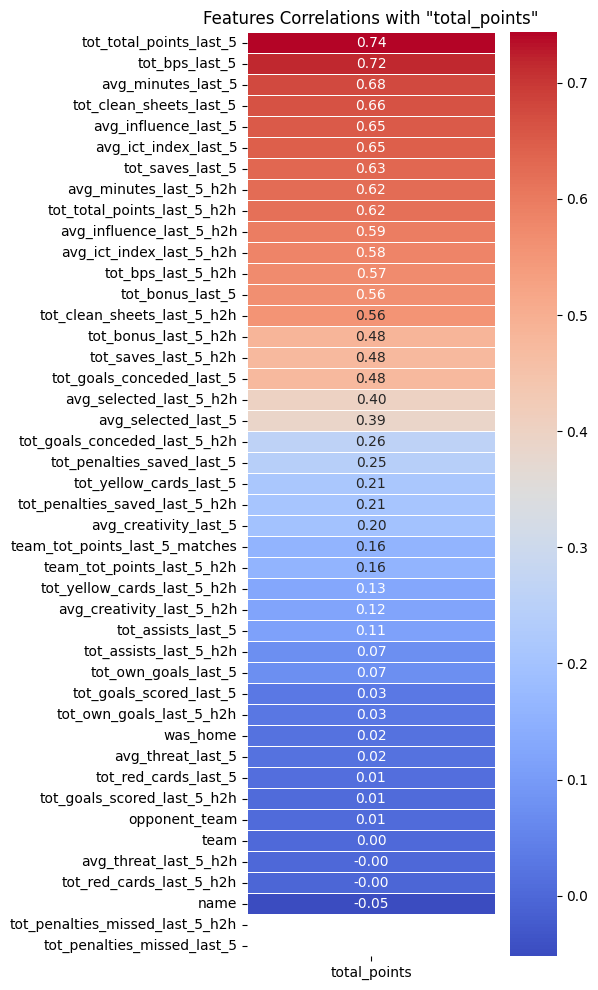

In [355]:
gk_data = df.loc[df.position == 2].drop('position', axis=1)
gk_correlations = calculate_display_correlations(gk_data, 'total_points')

In [356]:
df[(df['position'] == 2) & (df['tot_goals_scored_last_5'] > 0)]['name'].drop_duplicates()

9632      108
43686     491
96062    1095
Name: name, dtype: int32

In [357]:
le_name.classes_[99]

'Alfie Gilchrist'

In [358]:
le_team.classes_[13]

'Ipswich Town'

Defender Position

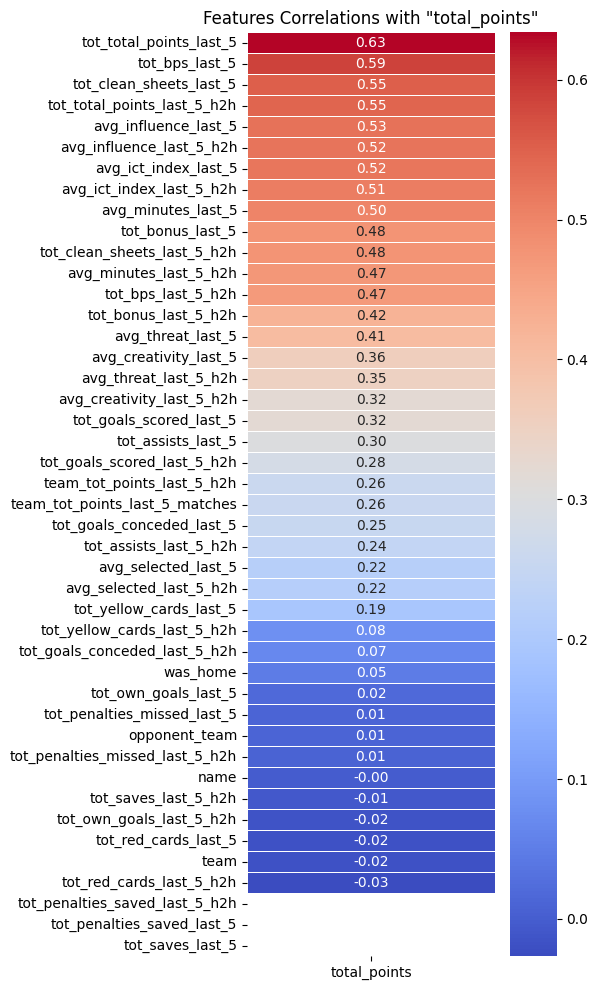

In [359]:
def_data = df.loc[df.position == 0].drop('position', axis=1)
def_correlations = calculate_display_correlations(def_data, 'total_points')

In [360]:
df[(df['position'] == 0) & (df['tot_saves_last_5_h2h'] > 0)]['name'].drop_duplicates()

196932    2309
Name: name, dtype: int32

In [361]:
le_name.classes_[2182]

'Troy Parrott'

Midfielder Position

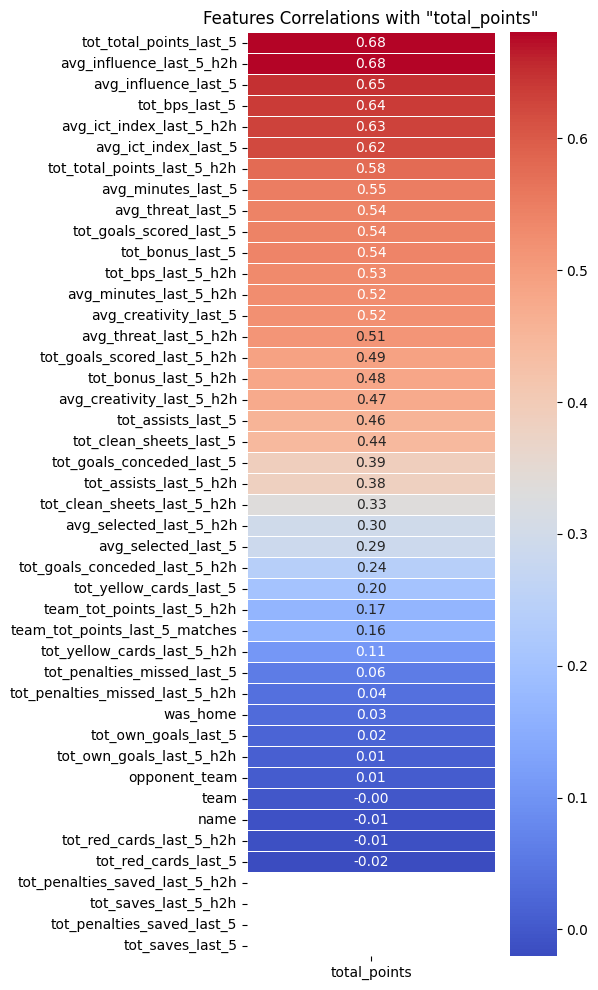

In [362]:
mid_data = df.loc[df.position == 3].drop('position', axis=1)
mid_correlations = calculate_display_correlations(mid_data, 'total_points')

In [363]:
df[(df['position'] == 3) & (df['tot_saves_last_5_h2h'] > 0)]['name'].drop_duplicates()

Series([], Name: name, dtype: int32)

Forward (FWD) Position

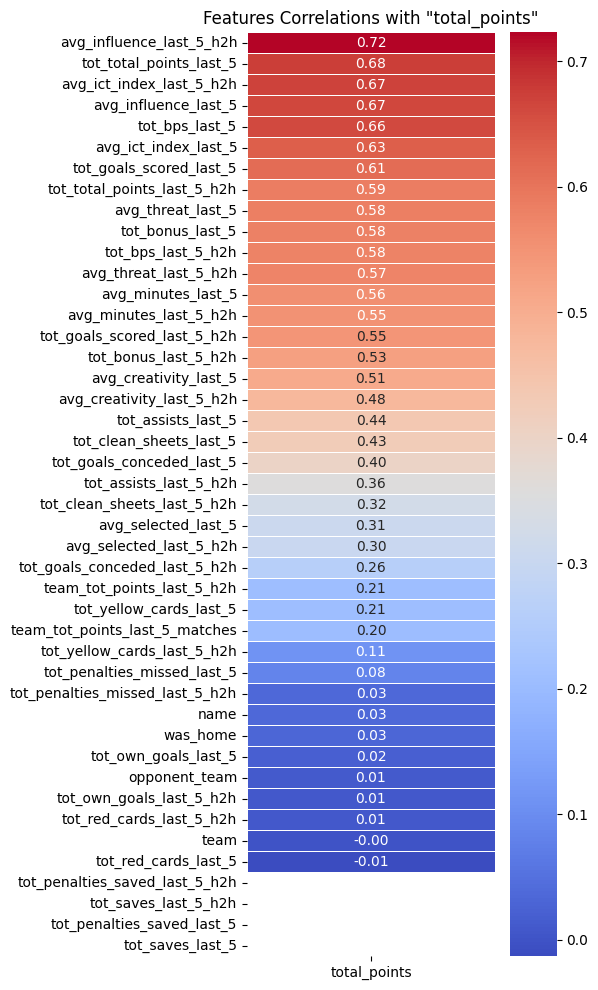

In [364]:
fwd_data = df.loc[df.position == 1].drop('position', axis=1)
fwd_correlations = calculate_display_correlations(fwd_data, 'total_points')

In [365]:
df[(df['position'] == 1) & (df['tot_saves_last_5'] > 0)]

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5


### Final Dataset

In [366]:
df

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,0,1,4,13,0.222222,0,0.000000,0.266667,0.0,0.000000,0.101887,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.079545,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.0,0.000000,0.067847,0.0,0.05,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,0.00,0.000000,0.000000,0.000000,0.000000,0.266667
1,0,1,4,5,0.222222,1,0.066667,0.066667,0.0,0.000000,0.101887,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.079545,0.055556,0.006098,0.000000,0.105528,0.001464,0.066667,0.0,0.000000,0.070796,0.0,0.10,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.05,0.011494,0.000000,0.089286,0.000734,0.166667
2,0,1,4,21,0.222222,0,0.333333,0.333333,0.0,0.000000,0.101887,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.079545,0.055556,0.012195,0.040323,0.090452,0.002380,0.222222,0.0,0.000000,0.073746,0.0,0.10,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.095238,0.10,0.011494,0.021277,0.116071,0.001285,0.188889
3,0,1,4,7,0.222222,0,0.266667,0.000000,0.0,0.000000,0.105660,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.079545,0.000000,0.000000,0.008065,0.000000,0.003412,0.277778,0.0,0.000000,0.079646,0.0,0.15,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.107143,0.05,0.011494,0.010638,0.089286,0.001819,0.211111
4,0,1,4,29,0.555556,1,0.200000,0.200000,0.0,0.230769,0.298113,0.2,0.000000,0.222222,0.0,0.0,0.0,0.0,0.00,0.000000,0.215909,0.555556,0.426829,0.193548,0.537688,0.003655,0.877778,0.0,0.214286,0.235988,0.2,0.15,0.181818,0.0,0.0,0.0,0.0,0.0,0.000000,0.261905,0.25,0.172414,0.063830,0.258929,0.002188,0.344444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197536,2316,2,7,4,0.250000,0,1.000000,1.000000,0.0,0.000000,0.150943,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.00,0.029412,0.090909,0.027778,0.060976,0.000000,0.000000,0.097765,1.000000,0.0,0.142857,0.389381,0.4,0.40,0.000000,0.0,0.0,0.0,0.0,0.0,0.390244,0.309524,0.10,0.275862,0.000000,0.000000,0.058247,1.000000
197537,2316,2,7,23,0.222222,0,1.000000,1.000000,0.0,0.000000,0.143396,0.0,0.090909,0.000000,0.0,0.0,0.0,0.0,0.00,0.058824,0.079545,0.055556,0.109756,0.000000,0.000000,0.097765,1.000000,0.0,0.142857,0.356932,0.4,0.25,0.000000,0.0,0.0,0.0,0.0,0.0,0.292683,0.297619,0.10,0.218391,0.000000,0.000000,0.073160,1.000000
197538,2316,2,7,2,0.277778,1,1.000000,1.000000,0.0,0.000000,0.166038,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.00,0.147059,0.102273,0.111111,0.231707,0.000000,0.000000,0.095116,1.000000,0.0,0.142857,0.368732,0.4,0.20,0.000000,0.0,0.0,0.0,0.0,0.0,0.341463,0.309524,0.10,0.241379,0.000000,0.000000,0.081464,1.000000
197539,2316,2,7,18,0.194444,1,0.000000,0.000000,0.0,0.000000,0.150943,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.25,0.117647,0.090909,0.055556,0.103659,0.000000,0.000000,0.009761,0.500000,0.0,0.000000,0.286136,0.2,0.20,0.000000,0.0,0.0,0.0,0.0,0.0,0.243902,0.202381,0.10,0.183908,0.000000,0.000000,0.072176,0.800000


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197541 entries, 0 to 197540
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   name                             197541 non-null  int32  
 1   position                         197541 non-null  int32  
 2   team                             197541 non-null  int32  
 3   opponent_team                    197541 non-null  int32  
 4   total_points                     197541 non-null  float64
 5   was_home                         197541 non-null  int64  
 6   team_tot_points_last_5_matches   197541 non-null  float64
 7   team_tot_points_last_5_h2h       197541 non-null  float64
 8   tot_assists_last_5_h2h           197541 non-null  float64
 9   tot_bonus_last_5_h2h             197541 non-null  float64
 10  tot_bps_last_5_h2h               197541 non-null  float64
 11  tot_clean_sheets_last_5_h2h      197541 non-null  float64
 12  to

In [368]:
df.columns

Index(['name', 'position', 'team', 'opponent_team', 'total_points', 'was_home',
       'team_tot_points_last_5_matches', 'team_tot_points_last_5_h2h',
       'tot_assists_last_5_h2h', 'tot_bonus_last_5_h2h', 'tot_bps_last_5_h2h',
       'tot_clean_sheets_last_5_h2h', 'tot_goals_conceded_last_5_h2h',
       'tot_goals_scored_last_5_h2h', 'tot_own_goals_last_5_h2h',
       'tot_penalties_missed_last_5_h2h', 'tot_penalties_saved_last_5_h2h',
       'tot_red_cards_last_5_h2h', 'tot_yellow_cards_last_5_h2h',
       'tot_saves_last_5_h2h', 'tot_total_points_last_5_h2h',
       'avg_ict_index_last_5_h2h', 'avg_influence_last_5_h2h',
       'avg_creativity_last_5_h2h', 'avg_threat_last_5_h2h',
       'avg_selected_last_5_h2h', 'avg_minutes_last_5_h2h',
       'tot_assists_last_5', 'tot_bonus_last_5', 'tot_bps_last_5',
       'tot_clean_sheets_last_5', 'tot_goals_conceded_last_5',
       'tot_goals_scored_last_5', 'tot_own_goals_last_5',
       'tot_penalties_missed_last_5', 'tot_penalties_save

In [369]:
le_name.classes_.tolist()

['Aaron Connolly',
 'Aaron Cresswell',
 'Aaron Hickey',
 'Aaron Lennon',
 'Aaron Mooy',
 'Aaron Ramsdale',
 'Aaron Ramsey',
 'Aaron Rowe',
 'Aaron Wan-Bissaka',
 'Abd-Al-Ali Morakinyo Olaposi Koiki',
 'Abdelhamid Sabiri',
 'Abdoulaye Doucouré',
 'Abdul Baba',
 'Abdul Fatawu',
 'Abel Hernández',
 'Aboubakar Kamara',
 'Abu Kamara',
 'Adalberto Peñaranda',
 'Adam Armstrong',
 'Adam Clayton',
 'Adam Davies',
 'Adam Federici',
 'Adam Forshaw',
 'Adam Idah',
 'Adam Lallana',
 'Adam Legzdins',
 'Adam Masina',
 'Adam Matthews',
 'Adam Reach',
 'Adam Smith',
 'Adam Webster',
 'Adam Wharton',
 'Adama Diakhaby',
 'Adama Diomande',
 'Adama Traoré',
 'Addji Keaninkin Marc-Israel Guehi',
 'Adedapo Awokoya-Mebude',
 'Ademola Lookman',
 'Ademola Ola-Adebomi',
 'Adlène Guédioura',
 'Admiral Muskwe',
 'Adnan Januzaj',
 'Adrian Blake',
 'Adrian Mariappa',
 'Adrian Mazilu',
 'Adrien Sebastian Perruchet Silva',
 'Adrien Silva',
 'Adrián Bernabé',
 'Adrián San Miguel del Castillo',
 'Ahmed El Mohamady',
 'A

In [370]:
le_position.classes_

array(['DEF', 'FWD', 'GK', 'MID'], dtype=object)

In [371]:
le_team.classes_

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Ipswich Town', 'Leeds United', 'Leicester City',
       'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Sheffield United', 'Southampton',
       'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham Hotspur',
       'Watford', 'West Bromwich United', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)